### Imports 

In [1]:
from budget import gen_budget_data,plot_changing_budget
from monthly import gen_monthly_data,plot_changing_month,plot_network_size, plot_runtimes
import configparser
from train import print_config,train_agent,before_after
from lightning_gym.utils import random_seed
import warnings
warnings.filterwarnings("ignore")


C:\lightning-gym\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\lightning-gym\venv\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\lightning-gym\venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
Using backend: pytorch


### Train Agent

training
	episodes = 100
	verbose = True
env
	budget = 10
	node_id = 
	repeat = False
	cutoff = 20
	graph_type = scale_free
	n = 128
	seed = 5785
agent
	load_model = False
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	learning_rate = 1e-2
	layers = 2
E: 0, S: 128, R: 0.3449, N:[0, 2, 3, 6, 8, 19, 23, 24, 25, 46]
E: 1, S: 128, R: 0.1774, N:[0, 1, 2, 5, 6, 10, 24, 34, 45, 119]
E: 2, S: 128, R: 0.4148, N:[0, 1, 6, 11, 14, 18, 21, 22, 37, 69]
E: 3, S: 128, R: 0.3658, N:[0, 1, 2, 3, 7, 11, 12, 42, 56, 72]
E: 4, S: 128, R: 0.4982, N:[0, 1, 2, 5, 7, 41, 49, 56, 61, 72]
E: 5, S: 128, R: 0.2726, N:[0, 1, 12, 19, 21, 22, 25, 38, 91, 108]
E: 6, S: 128, R: 0.1452, N:[0, 2, 13, 18, 24, 27, 29, 36, 49, 70]
E: 7, S: 128, R: 0.2374, N:[1, 2, 5, 8, 11, 23, 25, 34, 61, 71]
E: 8, S: 128, R: 0.3002, N:[1, 2, 4, 13, 15, 16, 29, 31, 39, 56]
E: 9, S: 128, R: 0.2568, N:[0, 2, 6, 9, 15, 34, 37, 49, 50, 58]
E: 10, S: 128, R: 0.2206, N:[1, 2, 5, 6,

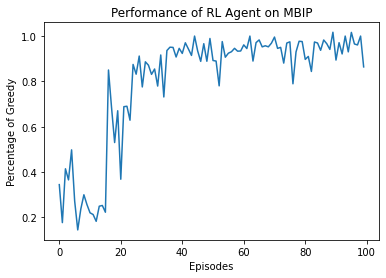

In [2]:
config = configparser.ConfigParser()
config_loc = "./configs/train_scale_free.conf"
config.read(config_loc)
# config["training"]["verbose"] = "True"
print_config(config)
seed = config["env"].getint("seed", fallback=None)
if seed:
    random_seed(seed)
# train_upwards(config)
log = train_agent(config, pog=True) # pog -> percentage of greedy
# before_after()
log.plot_reward(reward_type="pog")


### Path length distribution before and after adding a joining node with budget = 10

In [3]:
# config = configparser.ConfigParser()
# config_loc = "./configs/test_scale_free.conf"
# config.read(config_loc)
# print_config(config)
# seed = config["env"].getint("seed", fallback=None)
# if seed:
#     random_seed(seed)
# before_after(config)

### Generate monthly comparison

In [4]:
config = configparser.ConfigParser()
config_loc = "./configs/test_snapshot.conf"
config.read(config_loc)
print_config(config)
seed = config["env"].getint("seed", fallback=None)
if seed:
    random_seed(seed)
# gen_monthly_data(config)

training
	episodes = 0
	verbose = False
env
	budget = 10
	node_id = 
	repeat = True
	cutoff = 20
	graph_type = snapshot
	down_sample = False
	filename = 2-26-22.json
	seed = 5785
agent
	load_model = True
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	layers = 2
edge_filters
	minimum_capacity = 0
	maximum_capacity = 1_000_000_000_000
graph_filters
	remove_bridges = True
	combine_multiedges = True


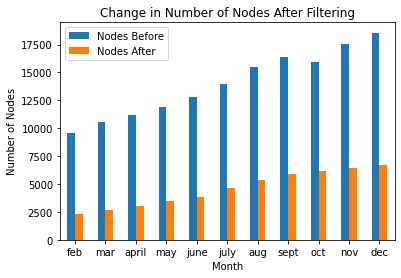

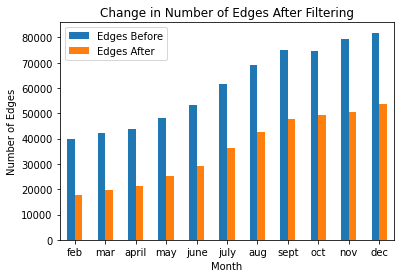

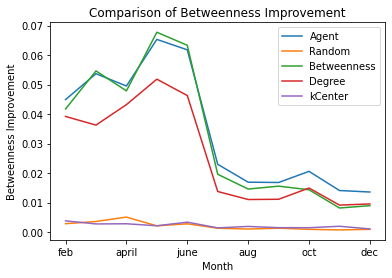

          Agent    Random  Betweenness    Degree   kCenter
feb    0.613153  0.357554     3.255305  0.395037  0.514589
mar    0.671488  0.421649     4.253393  0.466055  0.531861
april  0.750550  0.386742     5.213610  0.493754  0.671035
may    0.835848  0.491506     6.785199  0.528374  0.744832
june   1.042029  0.539029     8.492844  0.611760  0.783000
july   1.150009  0.663857    13.019621  0.792861  0.934067
aug    1.420923  0.851968    17.442158  0.927914  1.207783
sept   1.635820  1.010786    21.390024  1.008207  1.364738
oct    1.638598  0.937473    23.011620  1.088566  1.359598
nov    1.644262  0.960225    25.713958  1.085590  1.581824
dec    1.920104  1.314286    31.834893  1.240345  1.743940


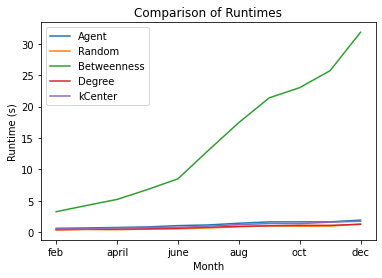

In [5]:
plot_network_size()
plot_changing_month()
plot_runtimes()

#### Generate results by budget

In [8]:
config = configparser.ConfigParser()
config_loc = "configs/test_scale_free.conf"
config.read(config_loc)
config["env"]["repeat"] = "True"
# config["training"]["verbose"] = "True"
seed = config["env"].getint("seed", fallback=None)
print_config(config)
if seed:
    random_seed(seed)
    print("seed set")
gen_budget_data(config)

training
	episodes = 0
	verbose = False
env
	budget = 10
	node_id = 
	repeat = True
	cutoff = 20
	n = 128
	graph_type = scale_free
	seed = 5785
agent
	load_model = True
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	layers = 2
edge_filters
	minimum_capacity = 0
	maximum_capacity = 1_000_000_000_000
graph_filters
	remove_bridges = True
	combine_multiedges = True
seed set
Agent Results 0.0
Random Results: 0.0
TopK Betweenness Results: 0.0
TopK Degree Results: 0.0
Greed Results: 0.0
Trained Greed Results: 0.0
kCenter Results: 0.0

Agent Results 0.0
Random Results: 4.9212598425196856e-05
TopK Betweenness Results: 0.0
TopK Degree Results: 0.0
Greed Results: 0.0
Trained Greed Results: 0.0
kCenter Results: 0.008501476377952758

Agent Results 0.029105736782902115
Random Results: 0.01921302805899264
TopK Betweenness Results: 0.029105736782902115
TopK Degree Results: 0.029105736782902115
Greed Results: 0.05848917322834644
Trained Gr

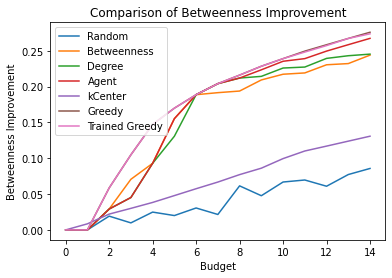

In [7]:
plot_changing_budget()